In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn import preprocessing
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

Step 1 - Importing and Reading the dataset



In [28]:
bank_data = pd.read_csv('bank-full.csv', sep = ";")
bank_data = bank_data.dropna()
print(bank_data.shape)
print(list(bank_data.columns))

(45211, 17)
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [29]:
bank_data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [30]:
bank_data.tail()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [31]:
bank_data.describe()


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [32]:
bank_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


The dimention of bank data set is 45211 rows and 17 columns to be observed.



Input variables:
bank client data:
1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")



related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable -> y y -> Whether the client has subscribed a term deposit or not Binomial ("yes" or "no")

Data Transformation


In [33]:
Y=bank_data['y']
X=bank_data.iloc[:,:16]
print(Y.isnull().sum())
print(Y.value_counts())

0
no     39922
yes     5289
Name: y, dtype: int64


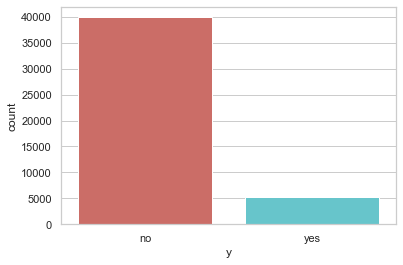

<Figure size 432x288 with 0 Axes>

In [34]:
sns.countplot(x = 'y', data=bank_data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [35]:
count_no_sub = len(bank_data[bank_data['y']=='no'])
count_sub = len(bank_data[bank_data['y']=='yes'])
print("No Subscription Count", count_no_sub)
print("Subscription Count",count_sub)
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

No Subscription Count 39922
Subscription Count 5289
percentage of no subscription is 88.30151954170445
percentage of subscription 11.698480458295547


Our classes are imbalanced, and the ratio of no-subscription to subscription instances is 88:12. Before we go ahead to balance the classes, let’s do some more exploration.



In [36]:
bank_data.groupby('y').mean()


,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


## Observations:

The average age of customers who bought the term deposit is higher than that of the customers who didn’t.

The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.

Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data

In [37]:
bank_data.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,
admin.,39.289886,1135.838909,15.564301,246.896732,2.575324,47.859021,0.671630
blue-collar,40.044081,1078.826654,15.442561,262.901562,2.816995,44.033498,0.505138
entrepreneur,42.190989,1521.470074,15.702085,256.309348,2.799597,32.486214,0.478144
housemaid,46.415323,1392.395161,16.002419,245.825000,2.820968,21.505645,0.371774
management,40.449567,1763.616832,16.114189,253.995771,2.864348,38.665468,0.668006
retired,61.626767,1984.215106,15.439488,287.361307,2.346731,37.443905,0.638693
self-employed,40.484484,1647.970868,16.027866,268.157061,2.853072,34.747308,0.551615
services,38.740250,997.088108,15.635532,259.318729,2.718344,41.995185,0.501204
student,26.542644,1388.060768,14.897655,246.656716,2.299574,57.041578,0.953092


In [38]:
bank_data.groupby('marital').mean()


,age,balance,day,duration,campaign,pdays,previous
marital,,,,,,,
divorced,45.782984,1178.872287,15.796428,262.517188,2.630882,41.001728,0.551373
married,43.408099,1425.925590,15.854487,253.412765,2.842875,37.950467,0.556552
single,33.703440,1301.497654,15.708210,266.497967,2.649805,44.652385,0.642690


In [39]:
bank_data.groupby('education').mean()


,age,balance,day,duration,campaign,pdays,previous
education,,,,,,,
primary,45.865567,1250.949934,15.421398,255.933002,2.834331,36.081740,0.489272
secondary,39.964270,1154.880786,15.759159,258.685760,2.700802,42.353504,0.567753
tertiary,39.593640,1758.416435,16.086535,258.518532,2.825577,39.024134,0.661980
unknown,44.510501,1526.754443,15.810985,257.313947,2.849219,36.856220,0.488422


## Data Visulization

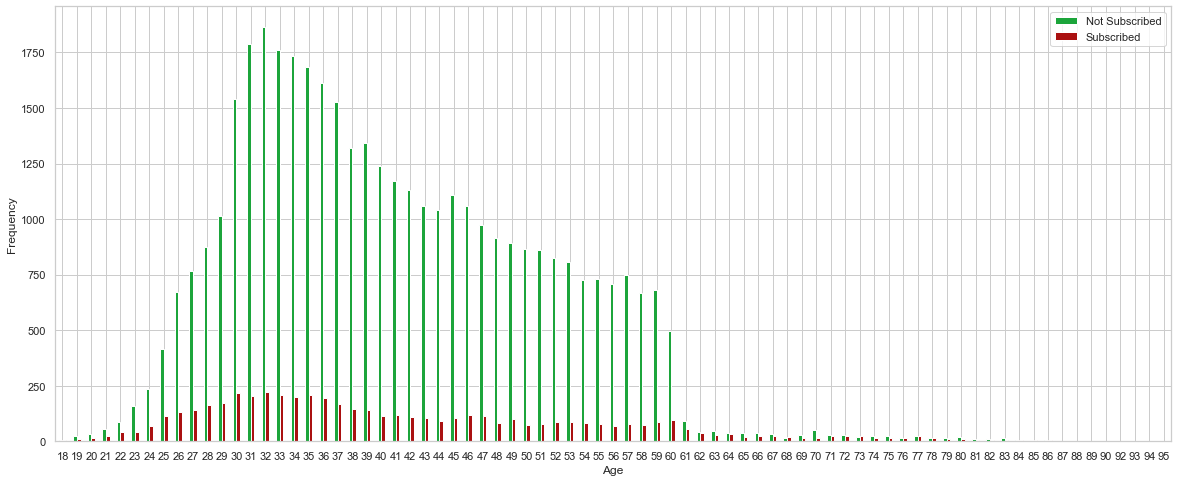

In [40]:
pd.crosstab(bank_data.age,bank_data.y).plot(kind="bar",figsize=(20,8),color=['#1CA53B','#AA1111' ])
plt.xticks(rotation=0)
plt.legend(["Not Subscribed", "Subscribed"])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

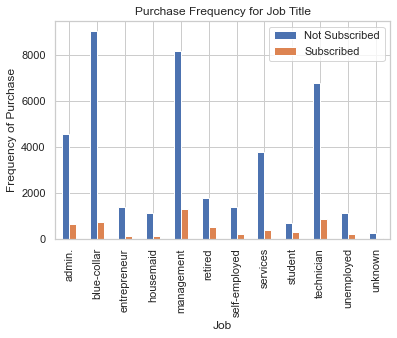

In [41]:
%matplotlib inline
pd.crosstab(bank_data.job,bank_data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.legend(["Not Subscribed", "Subscribed"])
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.



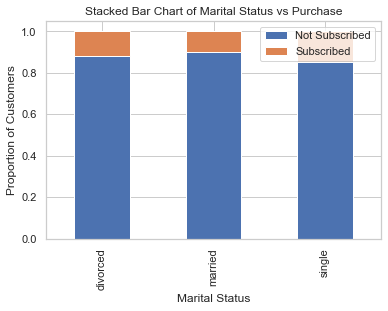

In [42]:
table=pd.crosstab(bank_data.marital,bank_data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.legend(["Not Subscribed", "Subscribed"])
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

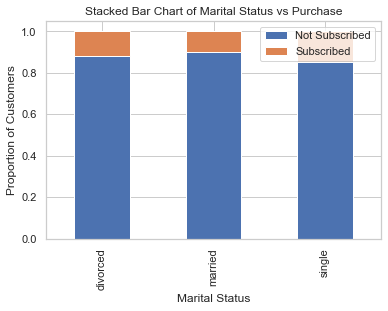

In [43]:
table=pd.crosstab(bank_data.marital,bank_data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.legend(["Not Subscribed", "Subscribed"])
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

The marital status does not seem a strong predictor for the outcome variable.



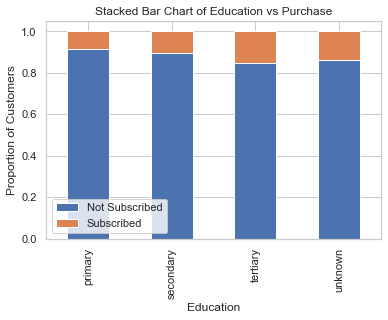

In [44]:
table=pd.crosstab(bank_data.education,bank_data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.legend(["Not Subscribed", "Subscribed"])
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

Education seems a good predictor of the outcome variable.



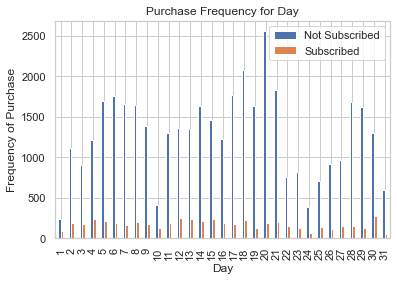

In [45]:
pd.crosstab(bank_data.day,bank_data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day')
plt.legend(["Not Subscribed", "Subscribed"])
plt.xlabel('Day')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_day_bar')

Day may not be a good predictor of the outcome.



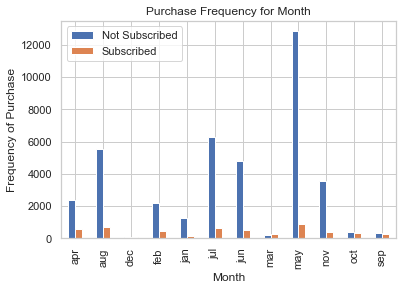

In [46]:
pd.crosstab(bank_data.month,bank_data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.legend(["Not Subscribed", "Subscribed"])
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

Month might be a good predictor of the outcome variable.



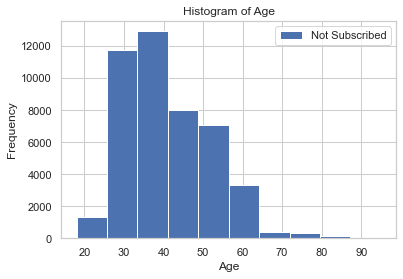

In [47]:
bank_data.age.hist()
plt.title('Histogram of Age')
plt.legend(["Not Subscribed", "Subscribed"])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

Most of the customers of the bank in this dataset are in the age range of 30–40.



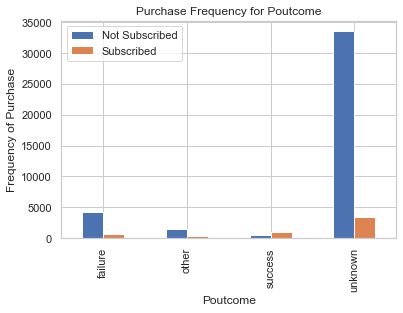

In [49]:
pd.crosstab(bank_data.poutcome,bank_data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.legend(["Not Subscribed", "Subscribed"])
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

Poutcome seems to be a good predictor of the outcome variable.



In [51]:
X= bank_data[['age','balance','day','duration','campaign','pdays','previous']]
y= bank_data['y'].map({'yes':1, 'no':0})
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Implementing the model

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
classifier = LogisticRegression(random_state = 0)
model1 = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  )
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  )
C:\Users\Admin\anaconda3\lib\site-pack

In [53]:
print('Confusion Matrix \n',cm)
print("\nAccuracy: {:.2f} %".format(accuracies.mean()*100))
print("\nStandard Deviation: {:.2f} %".format(accuracies.std()*100))
print('\nClassification Report\n',classification_report(y_test, y_pred))

Confusion Matrix 
 [[7862  118]
 [ 901  162]]

Accuracy: 88.76 %

Standard Deviation: 0.29 %

Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      7980
           1       0.58      0.15      0.24      1063

    accuracy                           0.89      9043
   macro avg       0.74      0.57      0.59      9043
weighted avg       0.86      0.89      0.86      9043



Implementing the model

In [54]:
logit_model =sm.Logit(y,X)
result1=logit_model.fit()
print(result1.summary())

Optimization terminated successfully.
         Current function value: 0.317447
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45204
Method:                           MLE   Df Model:                            6
Date:                Wed, 07 Apr 2021   Pseudo R-squ.:                  0.1203
Time:                        19:27:02   Log-Likelihood:                -14352.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0505      0.001    -53.998      0.000      -0.052      -0.049
balance     3.748e-05   4.26e

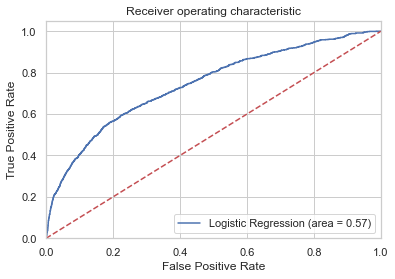

In [55]:
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [56]:
job=['admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown']
marital=['divorced','married','single']
education=['primary','secondary','tertiary','unknown']
contact=['cellular','telephone','unknown']
poutcome =['success','failure','other','unknown']
housing=['yes','no']
loan=['yes','no']
from sklearn import preprocessing
enc = preprocessing.OrdinalEncoder()
enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
enc = preprocessing.OneHotEncoder(categories=[job, marital, education,contact,poutcome,housing,loan])
X1= bank_data[['job','marital','education','contact','poutcome','housing','loan']]
enc.fit(X1)
X1_Array = enc.transform(X1).toarray()
print(X1_Array)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 1. 0. 1.]
 [0. 1. 0. ... 1. 0. 1.]
 [0. 0. 1. ... 1. 0. 1.]]


In [57]:

X_train, X_test, y_train, y_test = train_test_split(X1_Array, y, test_size = 0.2, random_state = 0)
classifier = LogisticRegression(random_state = 0)
model2 = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

In [58]:
print('Confusion Matrix \n',cm)
print("\nAccuracy: {:.2f} %".format(accuracies.mean()*100))
print("\nStandard Deviation: {:.2f} %".format(accuracies.std()*100))
print('\nClassification Report\n',classification_report(y_test, y_pred))

Confusion Matrix 
 [[7871  109]
 [ 885  178]]

Accuracy: 89.35 %

Standard Deviation: 0.26 %

Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      7980
           1       0.62      0.17      0.26      1063

    accuracy                           0.89      9043
   macro avg       0.76      0.58      0.60      9043
weighted avg       0.87      0.89      0.86      9043



In [59]:
logit_model=sm.Logit(y,X)
result2=logit_model.fit()
print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.317447
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45204
Method:                           MLE   Df Model:                            6
Date:                Wed, 07 Apr 2021   Pseudo R-squ.:                  0.1203
Time:                        19:28:21   Log-Likelihood:                -14352.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0505      0.001    -53.998      0.000      -0.052      -0.049
balance     3.748e-05   4.26e

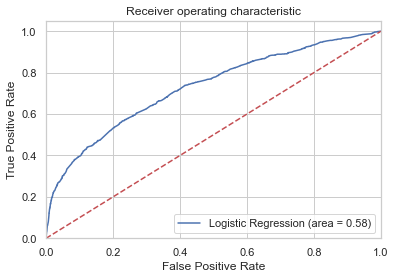

In [60]:
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [61]:
X2=bank_data[['age','balance','day','duration','campaign','pdays','previous']]
X2_Array = np.array(X2)
print(X2_Array)

[[  58 2143    5 ...    1   -1    0]
 [  44   29    5 ...    1   -1    0]
 [  33    2    5 ...    1   -1    0]
 ...
 [  72 5715   17 ...    5  184    3]
 [  57  668   17 ...    4   -1    0]
 [  37 2971   17 ...    2  188   11]]


In [62]:
X_Com= np.concatenate((X1_Array,X2_Array),axis=1)
print(X_Com)

[[  0.   0.   0. ...   1.  -1.   0.]
 [  0.   0.   0. ...   1.  -1.   0.]
 [  0.   0.   1. ...   1.  -1.   0.]
 ...
 [  0.   0.   0. ...   5. 184.   3.]
 [  0.   1.   0. ...   4.  -1.   0.]
 [  0.   0.   1. ...   2. 188.  11.]]


In [63]:

X_train, X_test, y_train, y_test = train_test_split(X_Com, y, test_size = 0.2, random_state = 0)
classifier = LogisticRegression(random_state = 0)
model3 = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  )
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  )
C:\Users\Admin\anaconda3\lib\site-pack

In [64]:
print('Confusion Matrix \n',cm)
print("\nAccuracy: {:.2f} %".format(accuracies.mean()*100))
print("\nStandard Deviation: {:.2f} %".format(accuracies.std()*100))
print('\nClassification Report\n',classification_report(y_test, y_pred))

Confusion Matrix 
 [[7824  156]
 [ 868  195]]

Accuracy: 89.13 %

Standard Deviation: 0.22 %

Classification Report
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7980
           1       0.56      0.18      0.28      1063

    accuracy                           0.89      9043
   macro avg       0.73      0.58      0.61      9043
weighted avg       0.86      0.89      0.86      9043



In [65]:
logit_model=sm.Logit(y,X)
result3=logit_model.fit()
print(result3.summary())

Optimization terminated successfully.
         Current function value: 0.317447
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45204
Method:                           MLE   Df Model:                            6
Date:                Wed, 07 Apr 2021   Pseudo R-squ.:                  0.1203
Time:                        19:29:50   Log-Likelihood:                -14352.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0505      0.001    -53.998      0.000      -0.052      -0.049
balance     3.748e-05   4.26e

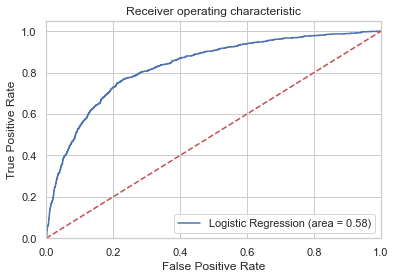

In [66]:

logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Interpretation: Of the entire test set, 88% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 90% of the customer's preferred term deposit were promoted.